## KNN Regression

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
sn.set(style='whitegrid')

In [46]:
housing = pd.read_csv('housing.data.txt',  header=None, sep='\s+')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                   'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                   'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

housing=pd.read_csv('boston_housing.csv')
housing.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/pn/m2nfshws0wd37gvf2z0f6v040000gn/T/ipykernel_9673/3275109406.py:1: SyntaxWarning: invalid escape sequence '\s'
  housing = pd.read_csv('housing.data.txt',  header=None, sep='\s+')
/var/folders/pn/m2nfshws0wd37gvf2z0f6v040000gn/T/ipykernel_9673/3275109406.py:1: SyntaxWarning: invalid escape sequence '\s'
  housing = pd.read_csv('housing.data.txt',  header=None, sep='\s+')


FileNotFoundError: [Errno 2] No such file or directory: 'housing.data.txt'

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

### Visualize the data using scatter plot

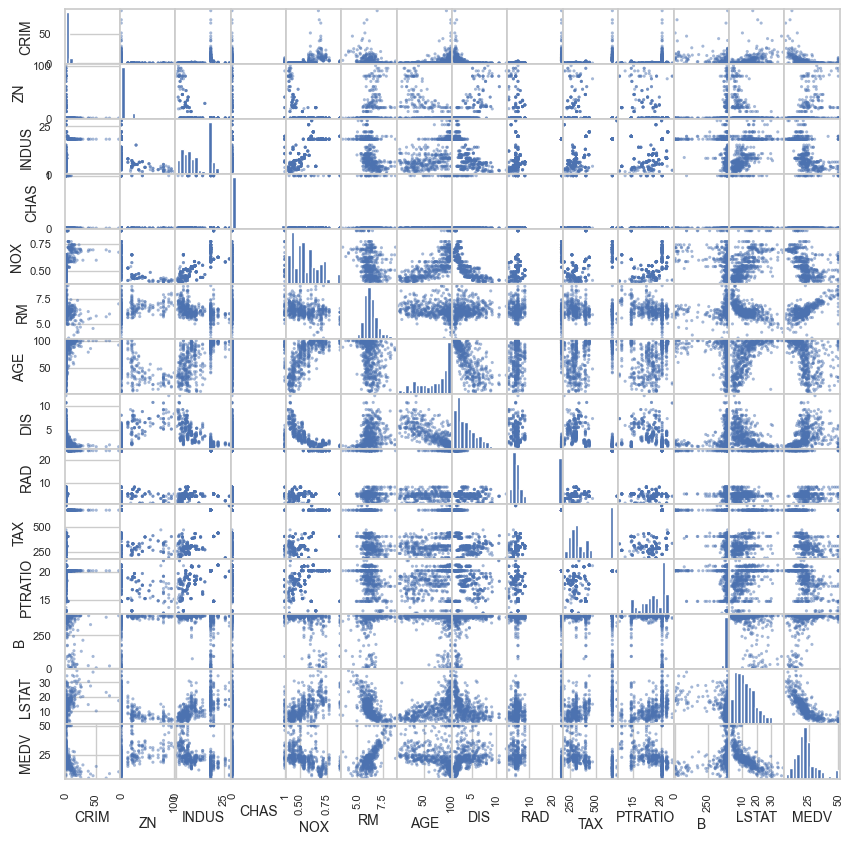

In [18]:
scatter = pd.plotting.scatter_matrix(housing, marker = '.', s=20, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 10) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 10) for item in scatter.ravel()]

### Split the data into a Training Set and a Testing/Test  Set

In [21]:
X = housing.iloc[:,:-1]
Y = housing.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
scaler=MinMaxScaler()
#normalize the features
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### Use a KNN Regression Model to predict house price (median value)

In [26]:
knn = KNeighborsRegressor(n_neighbors = 5)
# train the KNN regressor
knn.fit(X_train_s, Y_train)
# test the KNN regressor
Y_test_pred = knn.predict(X_test_s)
# Calculate errors on test set
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

MSE= 41.04290980392156
MAE= 3.9129411764705884
MAPE= 0.17370719413309002


In [7]:
#n_neighbors = 1
#MAPE= 0.15465967010249648 (on test set)

In [8]:
#n_neighbors = 2
#MAPE= 0.16040953840808694 (on test set)

In [9]:
#n_neighbors = 3
#MAPE= 0.16744002331643454 (on test set)

In [10]:
#n_neighbors = 5
#MAPE= 0.17370719413309002 (on test set)

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features_for_clustering = housing[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
housing['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualization of clusters using two key features (RM and MEDV)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housing['RM'], y=housing['MEDV'], hue=housing['Cluster'], palette='viridis', alpha=0.7)
plt.title('Cluster Analysis: Rooms (RM) vs. Median Value (MEDV)', fontsize=14)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Home Value (MEDV)')
plt.legend(title='Cluster', loc='upper left')
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>